In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(random_state=156,max_depth=5,min_samples_split=2)

test = pd.read_csv('JobCare_data/test.csv')
train =pd.read_csv('JobCare_data/train.csv')
submission  =pd.read_csv('JobCare_data/sample_submission.csv')

In [41]:
test = test.drop(['id','contents_open_dt'],axis=1)
train = train.drop(['id','contents_open_dt'],axis=1)

In [42]:
x=train.iloc[:,:-1]
y=train.iloc[:,-1]

dt_clf.fit(x,y)

DecisionTreeClassifier(max_depth=5, random_state=156)

In [43]:
from sklearn.tree import export_graphviz

# export_graphviz()의 호출 결과로 out_file로 지정된 tree.dot 파일을 생성함. 
export_graphviz(dt_clf, out_file="tree.dot",class_names = np.array(['0','1']),feature_names=x.columns.tolist(),impurity=True, filled=True)

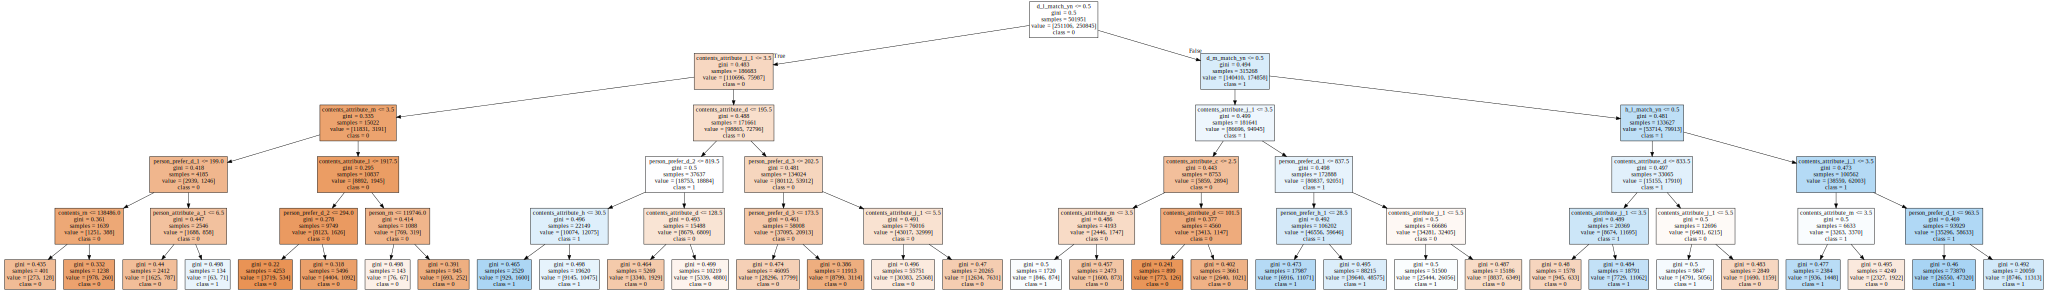

In [44]:
import graphviz

# 위에서 생성된 tree_model.dot 파일을 Graphviz 읽어서 Jupyter Notebook상에서 시각화 
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [48]:
graphviz.Source(dot_graph).render(filename='tree.png')

'tree.png.pdf'

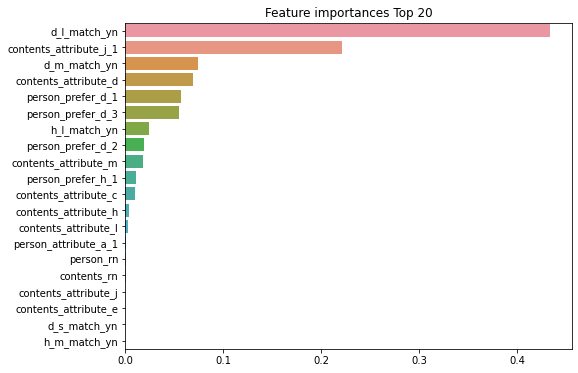

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

ftr_importances_values = dt_clf.feature_importances_

# Top 중요도로 정렬을 쉽게 하고, 시본(Seaborn)의 막대그래프로 쉽게 표현하기 위해 Series변환
ftr_importances = pd.Series(ftr_importances_values, index=x.columns)

# 중요도값 순으로 Series를 정렬
ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20 , y = ftr_top20.index)
plt.show()